In [1]:
import torch
import torch.nn as nn
import torch.nn. functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
import time
torch.manual_seed (101)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [2]:
transform = transforms.ToTensor()
train =  datasets.MNIST(root = './data', train = True, download = True, transform = transform)
test = datasets.MNIST(root = './data', train = False, download = True, transform = transform)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 33542189.22it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 1107972.06it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 9395072.53it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 3546263.73it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
train_Data = DataLoader(train, batch_size = 100, shuffle = True)
test_Data = DataLoader(test, batch_size = 100, shuffle = False)

torch.Size([1, 28, 28])
Label: 5


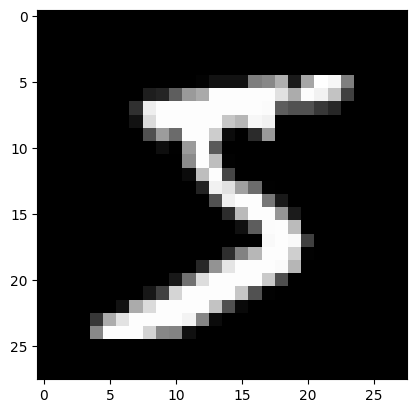

In [4]:
image , label = train[0]
print(image.shape)
print("Label:", label)
plt.imshow(image.reshape(28,28),cmap = 'gray')

In [5]:
class MLP(nn.Module):
  def __init__(self, input_size = 784, output_size = 10):
    super().__init__()
    self.fc1 = nn.Linear(input_size, 30)
    self.fc2 = nn.Linear(30, 20)
    self.fc3 = nn.Linear(20, output_size)

  def forward(self,X):
    X = F.relu(self.fc1(X))
    X1 = F.relu(self.fc2(X))
    X2 = self.fc3(X1)
    return F.log_softmax(X2, dim=1) , X1

In [6]:
model = MLP()
print(model)

MLP(
  (fc1): Linear(in_features=784, out_features=30, bias=True)
  (fc2): Linear(in_features=30, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=10, bias=True)
)


In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [8]:
epochs = 10
train_loss = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (X_train, y_train) in enumerate(train_Data):
        X_train = X_train.view(X_train.size(0), -1)
        y_pred, _ = model(X_train)
        loss = criterion(y_pred, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss = loss.item()
    print(f'Epoch [{epoch+1}/{epochs}] - Batch Loss: {running_loss:.8f}')
    train_loss.append(running_loss)



Epoch [1/10] - Batch Loss: 0.22289589
Epoch [2/10] - Batch Loss: 0.21716443
Epoch [3/10] - Batch Loss: 0.16722712
Epoch [4/10] - Batch Loss: 0.21674345
Epoch [5/10] - Batch Loss: 0.12683344
Epoch [6/10] - Batch Loss: 0.15691592
Epoch [7/10] - Batch Loss: 0.11437698
Epoch [8/10] - Batch Loss: 0.12360182
Epoch [9/10] - Batch Loss: 0.03203799
Epoch [10/10] - Batch Loss: 0.02361427


In [9]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for X_test, y_test in test_Data:
        X_test = X_test.view(X_test.size(0), -1)
        y_pred, _ = model(X_test)
        _, predicted = torch.max(y_pred, 1)

        total += y_test.size(0)
        correct += (predicted == y_test).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model: {accuracy:.2f}%')


Accuracy of the model: 96.43%


In [10]:
import torch
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix


X_train_flat = train.data.view(-1, 28*28).numpy()
y_train = train.targets.numpy()

X_test_flat = test.data.view(-1, 28*28).numpy()
y_test = test.targets.numpy()


lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100)


scaler = StandardScaler()
X_train_flat_scaled = scaler.fit_transform(X_train_flat)
X_test_flat_scaled = scaler.transform(X_test_flat)


lr.fit(X_train_flat_scaled, y_train)
rf.fit(X_train_flat_scaled, y_train)


mlp_outputs, _ = model(torch.Tensor(test.data.view(-1, 28*28).float()))
mlp_preds = mlp_outputs.argmax(dim=1).numpy()


lr_preds = lr.predict(X_test_flat_scaled)
rf_preds = rf.predict(X_test_flat_scaled)




In [11]:
from sklearn.metrics import accuracy_score

lr_accuracy = accuracy_score(y_test, lr_preds) * 100
rf_accuracy = accuracy_score(y_test, rf_preds) * 100

print(f"Accuracy by Logistic Regression: , {lr_accuracy:.2f}%")
print(f"Accuracy by Random Forest: {rf_accuracy:.2f}%")

Accuracy by Logistic Regression: , 92.18%
Accuracy by Random Forest: 97.05%


In [12]:
print("F1 Score (MLP):", f1_score(y_test, mlp_preds, average='macro'))
print("F1 Score (Logistic Regression):", f1_score(y_test, lr_preds, average='macro'))
print("F1 Score (Random Forest):", f1_score(y_test, rf_preds, average='macro'))

F1 Score (MLP): 0.9605612367235171
F1 Score (Logistic Regression): 0.9207416627887856
F1 Score (Random Forest): 0.9702690692118926


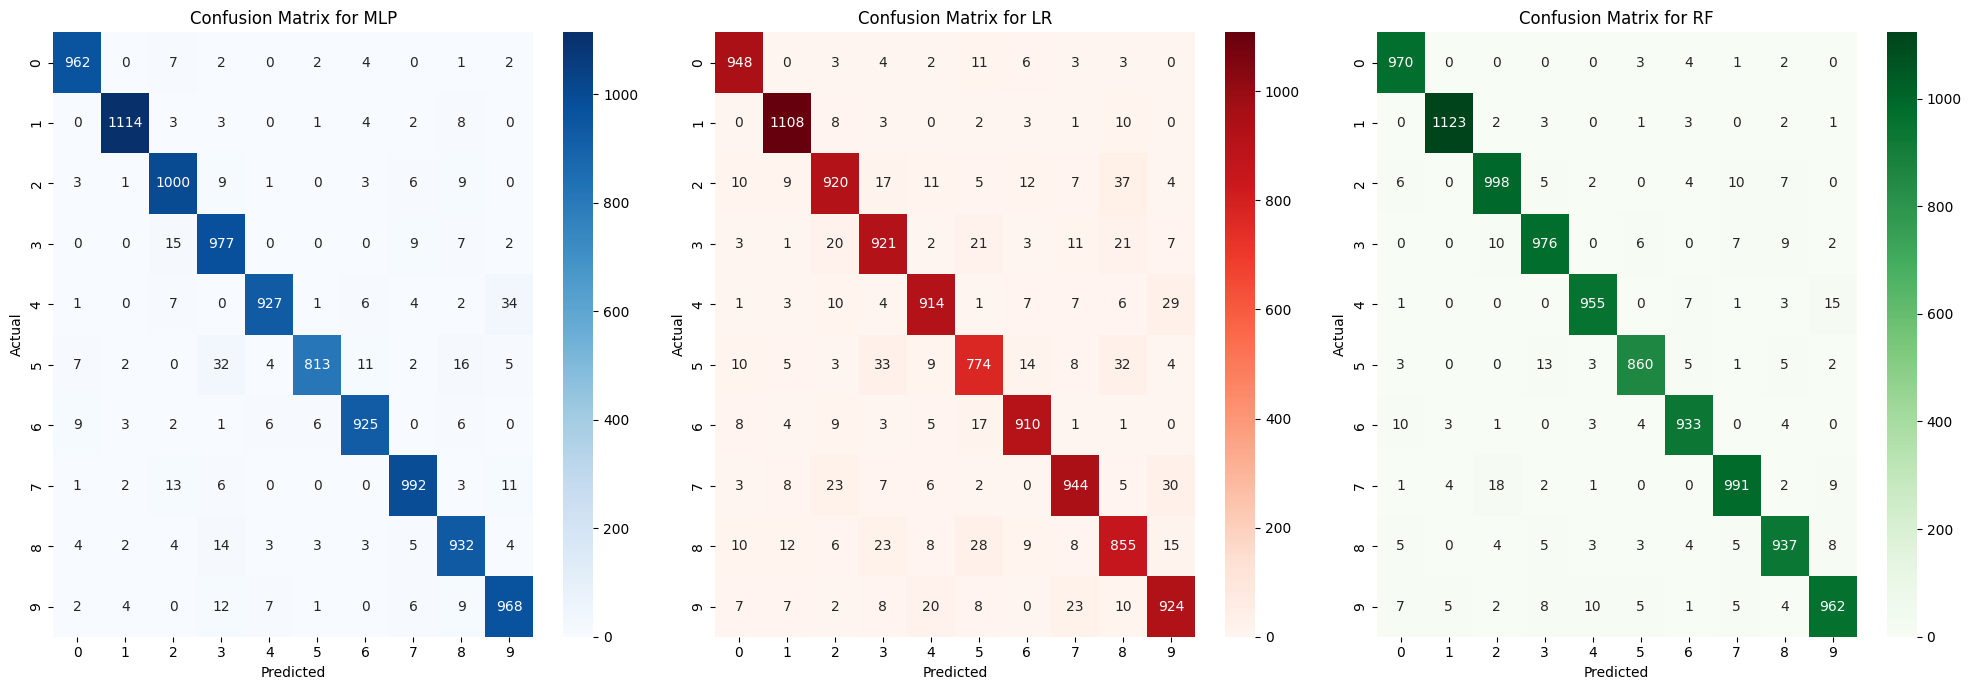

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

mlp_conf_matrix = confusion_matrix(y_test, mlp_preds)
lr_conf_matrix = confusion_matrix(y_test, lr_preds)
rf_conf_matrix = confusion_matrix(y_test, rf_preds)

fig, axes = plt.subplots(1, 3, figsize=(20, 7))

sns.heatmap(mlp_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix for MLP")
axes[0].set_ylabel("Actual")
axes[0].set_xlabel("Predicted")


sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Reds', ax=axes[1])
axes[1].set_title("Confusion Matrix for LR")
axes[1].set_ylabel("Actual")
axes[1].set_xlabel("Predicted")


sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Greens', ax=axes[2])
axes[2].set_title("Confusion Matrix for RF")
axes[2].set_ylabel("Actual")
axes[2].set_xlabel("Predicted")


plt.tight_layout()
plt.show()


In [14]:
# Plotting T-SNE

all_20_neuron_outputs = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_Data:
        _, layer_20_output = model(X_batch.view(-1, 28*28))
        all_20_neuron_outputs.append(layer_20_output)
        all_labels.append(y_batch)

all_20_neuron_outputs = torch.cat(all_20_neuron_outputs).numpy()
all_labels = torch.cat(all_labels).numpy()


In [15]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(all_20_neuron_outputs)


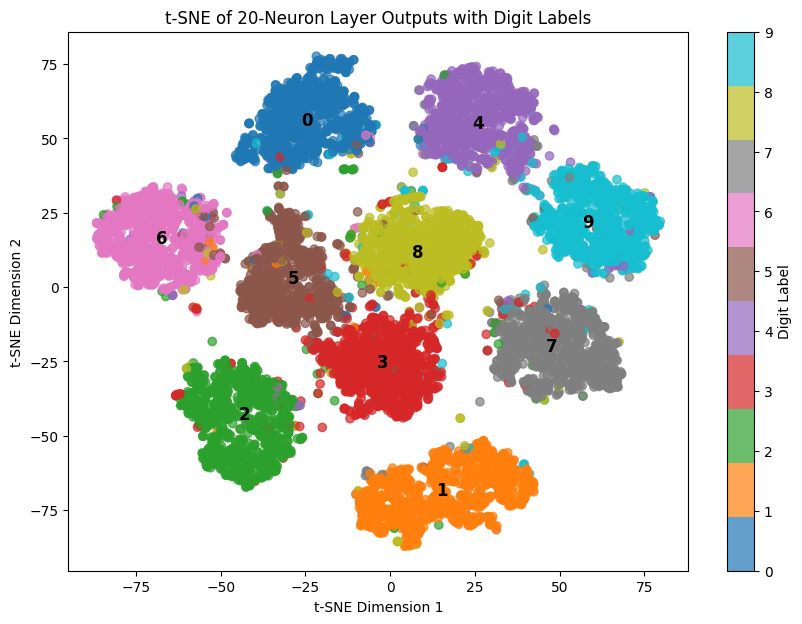

In [16]:
unique_labels = np.unique(all_labels)
mean_positions = {label: tsne_results[all_labels == label].mean(axis=0) for label in unique_labels}


plt.figure(figsize=(10, 7))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=all_labels, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, ticks=range(10), label='Digit Label')

for label, (x, y) in mean_positions.items():
    plt.text(x, y, str(label), fontsize=12, fontweight='bold', ha='center', va='center', color='black')

plt.title('t-SNE of 20-Neuron Layer Outputs with Digit Labels')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [17]:
# Untrained Model

untrained_model = MLP(input_size=784, output_size=10)
untrained_outputs = []
with torch.no_grad():
    for X_batch, _ in test_Data:
        X_batch = X_batch.view(X_batch.size(0), -1)
        _, untrainedoutput = untrained_model(X_batch)
        untrained_outputs.append(untrainedoutput)

untrained_outputs = torch.cat(untrained_outputs).numpy()
untrained_tsne_results = TSNE(n_components=2, random_state=42).fit_transform(untrained_outputs)


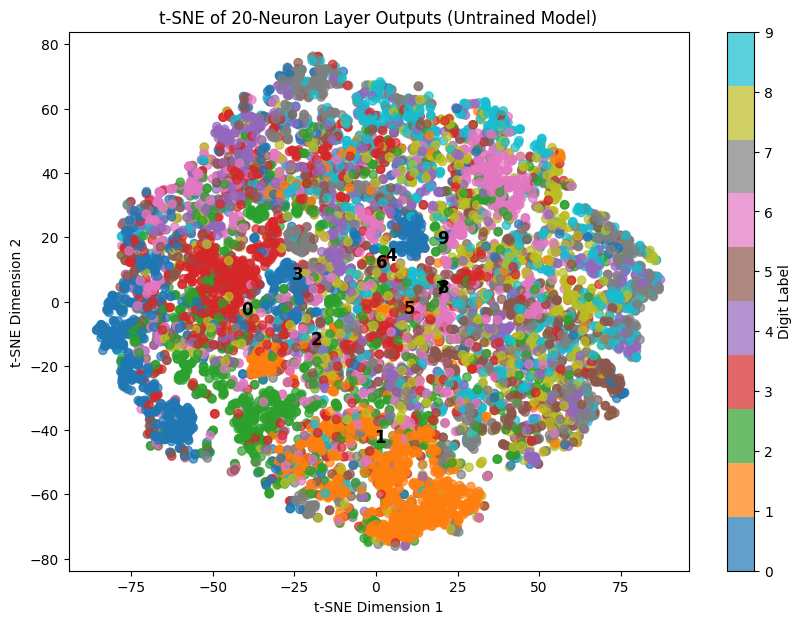

In [18]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(untrained_tsne_results[:, 0], untrained_tsne_results[:, 1], c=all_labels, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, ticks=range(10), label='Digit Label')


unique_labels = np.unique(all_labels)
for label in unique_labels:
    indices = np.where(all_labels == label)
    mean_x, mean_y = untrained_tsne_results[indices].mean(axis=0)
    plt.text(mean_x, mean_y, str(label), fontsize=12, fontweight='bold', ha='center', va='center', color='black')

plt.title('t-SNE of 20-Neuron Layer Outputs (Untrained Model)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [19]:
# predicting on fashion MNIST dataset
fashion_test = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
fashion_test_Data = DataLoader(fashion_test, batch_size=100, shuffle=False)

100%|██████████| 26421880/26421880 [00:01<00:00, 16285117.48it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 275593.36it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5085352.98it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 11334528.60it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [20]:
fashion_20_neuron_outputs = []
fashion_labels = []

with torch.no_grad():
    for X_batch, y_batch in fashion_test_Data:
        X_batch = X_batch.view(X_batch.size(0), -1)
        _, layer_20_output = model(X_batch)
        fashion_20_neuron_outputs.append(layer_20_output)
        fashion_labels.extend(y_batch.numpy())

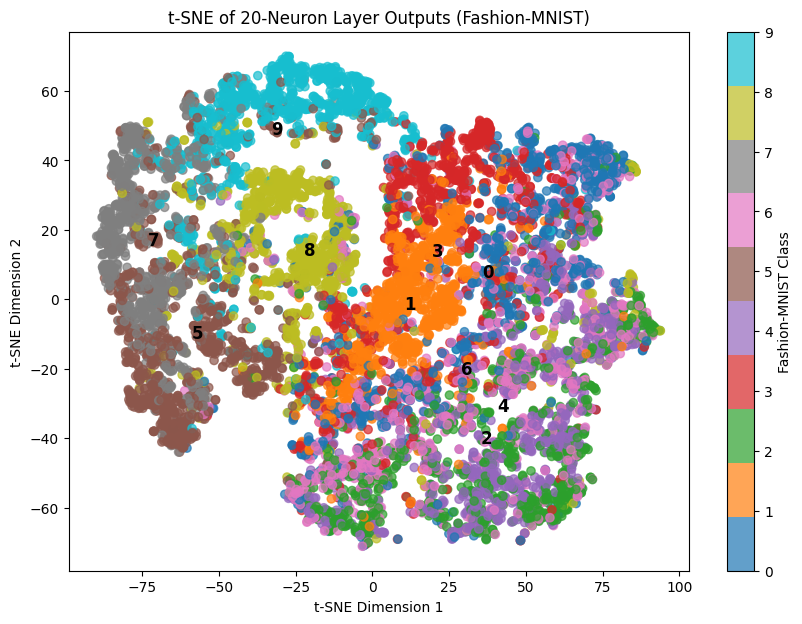

In [21]:
fashion_20_neuron_outputs = torch.cat(fashion_20_neuron_outputs).numpy()
fashion_tsne_results = TSNE(n_components=2, random_state=42).fit_transform(fashion_20_neuron_outputs)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(fashion_tsne_results[:, 0], fashion_tsne_results[:, 1], c=fashion_labels, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, ticks=range(10), label='Fashion-MNIST Class')
unique_fashion_labels = np.unique(fashion_labels)
for label in unique_fashion_labels:
    indices = np.where(fashion_labels == label)
    mean_x, mean_y = fashion_tsne_results[indices].mean(axis=0)
    plt.text(mean_x, mean_y, str(label), fontsize=12, fontweight='bold', ha='center', va='center', color='black')

plt.title('t-SNE of 20-Neuron Layer Outputs (Fashion-MNIST)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()